In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from ConfusionMatrix import ConfusionMatrix

from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif']})
rc('text', usetex=True)

In [2]:
labels_subset = np.load('./Plots/labels_CM_subset.npy', allow_pickle=True)
labels = np.load('./Plots/labels_CM.npy', allow_pickle=True)

In [3]:
cm_filename1 = 'confusion_matrix_model_fine_tune_VGG16_no_edge_frames_2020-01-25-16:03:08_subset'
report1 = './Confusion_Matrix/classification_report_fine_tune_VGG16_no_edge_frames_2020-01-25-16:03:08_subset.csv'
history1 = './logs/fine_tune_VGG16_no_edge_frames_2020-01-25-16:03:08.log'
cm_filename2 = 'confusion_matrix_model_fine_tune_VGG16_no_edge_frames_2020-01-24-03:03:13_subset'
report2 = './Confusion_Matrix/classification_report_fine_tune_VGG16_no_edge_frames_2020-01-24-03:03:13_subset.csv'

In [5]:
history[history['val_loss'] == 1.7144170847344906]

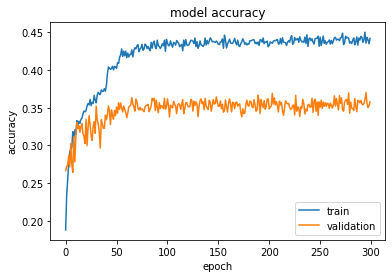

In [9]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

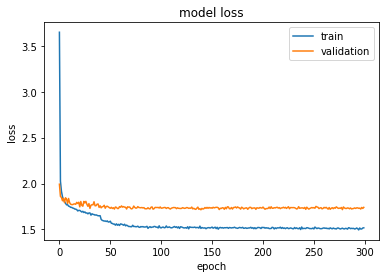

In [11]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [4]:
df1 = pd.read_csv(report1)
df2 = pd.read_csv(report2)

In [5]:
classes_report1 = df1[:7]
classes_report2 = df2[:7]

In [6]:
classes_report1.mean()

precision      0.333044
recall         0.405857
f1-score       0.335686
support      540.857143
dtype: float64

In [13]:
classes_report2.describe()

,precision,recall,f1-score,support
count,7.000000,7.000000,7.000000,7.000000
mean,0.346033,0.378798,0.351178,540.857143
std,0.164942,0.094256,0.115312,393.603620
min,0.167224,0.193103,0.180064,159.000000
25%,0.218395,0.363543,0.279677,263.500000
50%,0.355460,0.412939,0.387833,385.000000
75%,0.419558,0.425052,0.417058,731.500000
max,0.623643,0.468354,0.496877,1252.000000


In [8]:
df1

,Unnamed: 0,precision,recall,f1-score,support
0,cg01,0.147157,0.435644,0.220000,101.000000
1,cg02,0.259684,0.478836,0.336744,378.000000
2,cg07,0.117470,0.253247,0.160494,154.000000
3,cg14,0.670688,0.389902,0.493126,1426.000000
4,cg47,0.243961,0.517949,0.331691,195.000000
5,cg63,0.545455,0.360424,0.434043,1132.000000
6,cg64,0.346895,0.405000,0.373702,400.000000
7,accuracy,0.393819,0.393819,0.393819,0.393819
8,macro avg,0.333044,0.405857,0.335686,3786.000000
9,weighted avg,0.499551,0.393819,0.418098,3786.000000


In [9]:
df2

,Unnamed: 0,precision,recall,f1-score,support
0,cg01,0.167224,0.314465,0.218341,159.000000
1,cg02,0.365854,0.412621,0.387833,618.000000
2,cg07,0.168675,0.193103,0.180064,290.000000
3,cg14,0.623643,0.412939,0.496877,1252.000000
4,cg47,0.268116,0.468354,0.341014,237.000000
5,cg63,0.473262,0.418935,0.444444,845.000000
6,cg64,0.355460,0.431169,0.389671,385.000000
7,accuracy,0.398574,0.398574,0.398574,0.398574
8,macro avg,0.346033,0.378798,0.351178,3786.000000
9,weighted avg,0.444455,0.398574,0.410751,3786.000000


In [10]:
cm1 = ConfusionMatrix(labels_subset, 
                     cm_file='./Confusion_Matrix/' + cm_filename1 + '.npy')
cm2 = ConfusionMatrix(labels_subset, 
                     cm_file='./Confusion_Matrix/' + cm_filename2 + '.npy')

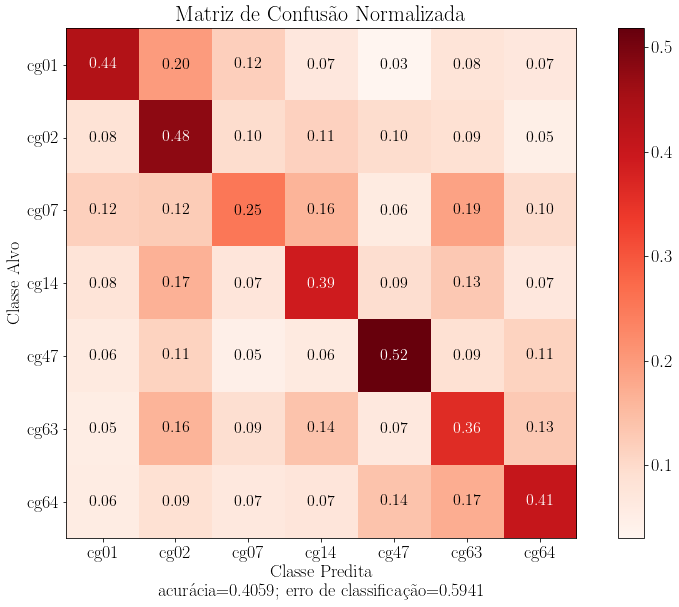

In [11]:
cm1.plot_figure(rotation=0, fig_name=cm_filename1, save_fig=True)

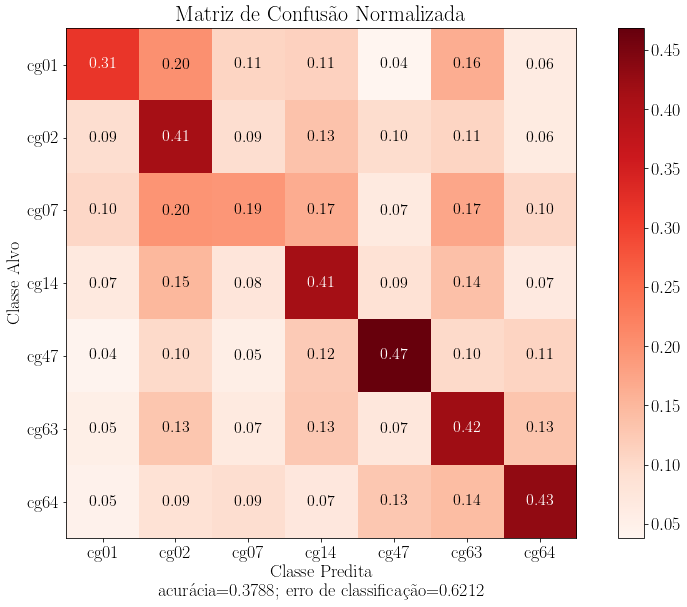

In [12]:
cm2.plot_figure(rotation=0, fig_name=cm_filename2, save_fig=True)